# **Classificador Bayesiano - SME0828 - Introdução à Ciência de Dados**

### Amanda Caroline de Oliveira Pires


## **Bibliotecas e funções**

Bibliotecas:

In [3]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets as skdata
import random


Funções:


In [4]:
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from sklearn import datasets
from matplotlib import pyplot
from pandas import DataFrame
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn import linear_model
from scipy.special import expit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from numpy.lib import index_tricks
from sklearn import metrics
from scipy.stats import multivariate_normal
from sklearn.neighbors import KernelDensity

**1-** Considerando a base de dados Vehicle, encontre o melhor classificador dentre os métodos k-vizinhos, Naive Bayes, regressão logística, classificador Bayesiano e classificador Bayesino não-paramétrico.

In [ ]:
# leitura dos dados
vehicle = pd.read_csv('/content/Vehicle.csv', header=(0))
#display(vehicle)

vehicle = vehicle.to_numpy()
nrow,ncol = vehicle.shape
y = vehicle[:,-1]
X = vehicle[:,0:ncol-1]

# **Método K-vizinhos** 

In [ ]:
# Normalizando os dados
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# estatísticas
print('Dados transformados:')
print('Media: ', np.mean(X, axis = 0))
print('Desvio Padrao:', np.std(X, axis = 0))

Dados transformados:
Media:  [ 5.87919521e-16 -3.14956886e-16 -3.65349988e-16 -1.67977006e-16
  3.77948264e-17 -1.63777581e-16 -3.56951138e-16  1.72176431e-16
  1.67977006e-17  8.27286755e-16 -9.02876408e-17 -1.46979880e-16
  3.73748839e-16 -6.92905150e-16 -5.24928144e-17 -2.93959761e-17
 -1.31022065e-15  1.52649104e-15]
Desvio Padrao: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# Definindo conjunto de teste e de treino
p = 0.7 
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

# Realizando a classificação pelo método k-vizinhos 

k = 5 # numero de vizinhos
# ajusta o modelo k-vizinhos
model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
model.fit(x_train,y_train)
# faz a predição no conjunto de teste
y_pred = model.predict(x_test) 


# Calculando a acurácia 
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)
KNN = score
#print(KNN)

Accuracy: 0.6338582677165354
0.6338582677165354


# **Naive Bayes**

In [ ]:
vehicle = pd.read_csv('/content/Vehicle.csv', header=(0))
vehicle = vehicle.dropna(axis='rows') #remove NaN
# armazena os nomes das classes
classes = np.array(pd.unique(vehicle[vehicle.columns[-1]]), dtype=str)  

print("Número de linhas e colunas na matriz de atributos:", vehicle.shape)
attributes = list(vehicle.columns)

Número de linhas e colunas na matriz de atributos: (846, 19)


In [ ]:
vehicle = vehicle.to_numpy()
nrow,ncol = vehicle.shape
y = vehicle[:,-1]
X = vehicle[:,0:ncol-1]

Selecionando os conjuntos de treinamento e teste

In [ ]:
p = 0.7 # fracao de elementos no conjunto de treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

Definindo a função verossimilhança

In [ ]:
def likelyhood(y, Z):
    def gaussian(x, mu, sig):
        p = (1/np.sqrt(2*np.pi*sig))*np.exp((-1/2)*((x-mu)/sig)**2)
        return p 
    lk = 1
    for j in np.arange(0, Z.shape[1]):
        m = np.mean(Z[:,j])
        s = np.std(Z[:,j])      
        lk = lk*gaussian(y[j], m, s)
    return lk

Estimação para cada classe

In [ ]:
P = pd.DataFrame(data=np.zeros((X_test.shape[0], len(classes))), columns = classes) 
for i in np.arange(0, len(classes)):
    elements = tuple(np.where(y_train == classes[i]))
    Z = X_train[elements,:][0]
    for j in np.arange(0,X_test.shape[0]):
        x = X_test[j,:]
        pj = likelyhood(x,Z)
        priori = len(elements)/X_train.shape[0]
        P[classes[i]][j] = pj*priori

Para as observações no conjunto de teste, a probabilidade pertencer a cada classe:

In [ ]:
P.head(10)

,van,saab,bus,opel
0,1.115872e-22,1.230187e-25,9.779233e-22,4.896625e-25
1,9.011668e-22,1.365758e-27,1.071111e-24,3.422857e-27
2,9.583113e-22,1.896380e-26,1.849439e-22,6.378875e-26
3,6.691389e-21,1.008691e-23,2.859881e-24,8.790089e-24
4,7.152896e-23,6.692383e-26,7.936690e-22,3.132231e-25
5,2.341960e-20,7.375643e-23,3.596871e-22,7.263769e-23
6,1.234321e-21,1.123891e-22,8.840228e-23,6.540702e-23
7,2.049747e-50,3.698969e-22,3.508341e-27,2.057507e-22
8,2.457333e-21,8.329697e-26,3.314046e-22,2.907762e-25
9,5.888369e-53,7.896269e-23,2.006499e-29,2.602899e-23


Calculando a acurácia

In [ ]:
y_pred = []
for i in np.arange(0, P.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred.append(P.columns[c])
y_pred = np.array(y_pred, dtype=str)

score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

NaiveBayes = score
#print(NaiveBayes)

Accuracy: 0.452755905511811
0.452755905511811


# **Regressão logística**

In [ ]:
vehicle = pd.read_csv('/content/Vehicle.csv', header=(0))
vehicle = vehicle.dropna(axis='rows') #remove NaN
# armazena os nomes das classes
classes = np.array(pd.unique(vehicle[vehicle.columns[-1]]), dtype=str)  

print("Número de linhas e colunas na matriz de atributos:", vehicle.shape)
attributes = list(vehicle.columns)

Número de linhas e colunas na matriz de atributos: (846, 19)


Convertendo para o formato Numpy e normalizando:

In [ ]:
vehicle = vehicle.to_numpy()
nrow,ncol = vehicle.shape
y = vehicle[:,-1]
X = vehicle[:,0:ncol-1]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

Selecionamos os conjunto de treinamento e teste usando o método hold-out.

In [ ]:
p = 0.7  # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

Realizando a classificação por regressão logística:

In [ ]:
model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('Acurácia: ', model.score(x_test, y_test))
Regressãologística = model.score(x_test, y_test)
#print(Regressãologística)

Acurácia:  0.7757166947723441
0.7757166947723441


# **Classificador Bayesiano**

In [ ]:
vehicle = pd.read_csv('/content/Vehicle.csv', header=(0))

vehicle = vehicle.dropna(axis='rows') #remove NaN
# armazena os nomes das classes

nrow, ncol = vehicle.shape
print("Matriz de atributos: Número de linhas:", nrow, " colunas: ", ncol)
attributes = list(vehicle.columns)
#vehicle.head(10)

Matriz de atributos: Número de linhas: 846  colunas:  19


convertendo os dados para o formato Numpy para facilitar a sua manipulação:

In [ ]:
y = vehicle.iloc[:,-1]
classes = np.array(pd.unique(y))
vehicle = vehicle.to_numpy()
nrow,ncol = vehicle.shape
X = vehicle[:,0:ncol-1]

Normalizando os dados, de modo a evitar o efeito da escala dos atributos:

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

Calculando estatísticas:


In [ ]:
print('Dados transformados:')
print('Media: ', np.mean(X, axis = 0))
print('Desvio Padrao:', np.std(X, axis = 0))

Dados transformados:
Media:  [ 5.87919521e-16 -3.14956886e-16 -3.65349988e-16 -1.67977006e-16
  3.77948264e-17 -1.63777581e-16 -3.56951138e-16  1.72176431e-16
  1.67977006e-17  8.27286755e-16 -9.02876408e-17 -1.46979880e-16
  3.73748839e-16 -6.92905150e-16 -5.24928144e-17 -2.93959761e-17
 -1.31022065e-15  1.52649104e-15]
Desvio Padrao: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Definindo conjunto de treinamento e de teste

In [ ]:
from sklearn.model_selection import train_test_split
p = 0.7 # fracao de elementos no conjunto de treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

Realizando a classificação dos dados:

O caso paramétrico, assume que cada variável está distribuída de acordo com uma distribuição Normal

In [ ]:
#matrix to store the probabilities
P = pd.DataFrame(data=np.zeros((X_test.shape[0], len(classes))), columns = classes) 
Pc = np.zeros(len(classes)) #fraction of elements in each class
for i in np.arange(0, len(classes)):
    elements = np.array(np.where(y_train == classes[i]))
    Pc[i] = elements.shape[1]/len(y_train)
    Z = X_train[elements,:][0].astype(float)
    m = np.mean(Z, axis = 0)
    cv = np.cov(np.transpose(Z))
    for j in np.arange(0,X_test.shape[0]):
        x = X_test[j,:]
        pj = multivariate_normal.pdf(x, mean=m, cov=cv, allow_singular=True)
        P[classes[i]][j] = pj*Pc[i]

print(P)

              van          saab           bus          opel
0    8.076143e-12  2.526177e-13  9.078865e-03  5.145574e-12
1    1.617468e-02  2.294716e-35  8.407576e-23  2.268767e-30
2    2.446907e-07  1.454448e-07  7.667514e-02  1.319398e-07
3    2.446517e-04  4.411233e-03  2.193775e-11  2.732935e-04
4    3.532045e-05  3.684405e-04  4.040871e+00  5.670192e-03
..            ...           ...           ...           ...
249  0.000000e+00  1.013834e-28  2.951787e-05  1.047679e-18
250  2.558244e-21  2.670497e-08  4.084146e-02  3.205941e-07
251  8.576750e-07  2.495176e-05  2.327773e-07  5.819528e-04
252  2.338568e-11  1.990739e-01  2.057809e-10  1.166538e-01
253  7.280487e-01  1.215036e-25  3.530043e-24  1.033357e-20

[254 rows x 4 columns]


Classifica de acordo com a classe mais provável:

In [ ]:
y_pred = []

for i in np.arange(0, X_test.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred.append(classes[c])
y_pred = np.array(y_pred)
y_test = np.array(y_test)
print(y_pred)

['bus' 'van' 'bus' 'saab' 'bus' 'van' 'van' 'saab' 'bus' 'saab' 'saab'
 'bus' 'van' 'opel' 'opel' 'van' 'saab' 'bus' 'saab' 'opel' 'van' 'van'
 'opel' 'opel' 'opel' 'saab' 'opel' 'van' 'van' 'van' 'opel' 'van' 'bus'
 'van' 'van' 'bus' 'bus' 'saab' 'bus' 'opel' 'van' 'bus' 'opel' 'van'
 'saab' 'saab' 'bus' 'van' 'bus' 'van' 'bus' 'bus' 'van' 'saab' 'bus'
 'opel' 'saab' 'opel' 'saab' 'saab' 'bus' 'van' 'saab' 'bus' 'bus' 'bus'
 'saab' 'saab' 'opel' 'opel' 'saab' 'bus' 'saab' 'bus' 'van' 'van' 'saab'
 'opel' 'saab' 'van' 'bus' 'van' 'saab' 'saab' 'opel' 'saab' 'van' 'bus'
 'van' 'saab' 'saab' 'opel' 'bus' 'bus' 'opel' 'bus' 'van' 'van' 'bus'
 'opel' 'saab' 'saab' 'opel' 'van' 'bus' 'bus' 'saab' 'van' 'saab' 'opel'
 'van' 'bus' 'van' 'bus' 'bus' 'van' 'bus' 'opel' 'bus' 'saab' 'bus'
 'opel' 'saab' 'van' 'bus' 'saab' 'bus' 'van' 'bus' 'saab' 'bus' 'van'
 'bus' 'saab' 'bus' 'bus' 'bus' 'saab' 'opel' 'bus' 'van' 'saab' 'bus'
 'bus' 'van' 'opel' 'saab' 'opel' 'van' 'saab' 'opel' 'bus' 'bus' 's

Calculando a acurácia do modelo:


In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

BayesianoParamétrico = score
#print(BayesianoParamétrico)

Accuracy: 0.8937007874015748
0.8937007874015748


# **Classificador Bayesiano não paramétrico**

In [ ]:
vehicle = pd.read_csv('/content/Vehicle.csv', header=(0))

classes = np.array(pd.unique(vehicle[vehicle.columns[-1]]), dtype=str)  

Converte para matriz e vetor do numpy:

In [ ]:
vehicle = vehicle.to_numpy()
nrow,ncol = vehicle.shape
y = vehicle[:,-1]
X = vehicle[:,0:ncol-1]

Transforma os dados para terem media igual a zero e variancia igual a 1

In [ ]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

Seleciona os conjuntos de treinamento e teste

In [ ]:
p = 0.7 # fraction of elements in the training set
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

Matriz que armazena as probabilidades para cada classe:

In [ ]:
P = pd.DataFrame(data=np.zeros((x_test.shape[0], len(classes))), columns = classes) 
Pc = np.zeros(len(classes)) # Armaze a fracao de elementos em cada classe
h = 2
for i in np.arange(0, len(classes)): # Para cada classe
    elements = tuple(np.where(y_train == classes[i])) # elmentos na classe i
    Pc[i] = len(elements)/len(y_train) # Probabilidade pertencer a classe i
    Z = x_train[elements,:][0].astype(float) # Elementos no conjunto de treinamento
    kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(Z)
    for j in np.arange(0,x_test.shape[0]): # para cada observacao no conjunto de teste
        x = x_test[j,:]
        x = x.reshape((1,len(x)))
        # calcula a probabilidade pertencer a cada classe
        pj = np.exp(kde.score_samples(x)) 
        P[classes[i]][j] = pj*Pc[i]

Vetor com as classes preditas

In [ ]:
y_pred = [] 
for i in np.arange(0, x_test.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred.append(classes[c])
y_pred = np.array(y_pred, dtype=str)

Calcula a acurácia

In [ ]:
score = accuracy_score(y_pred, y_test)
print('Acuracia:', score)
Bayesiano_não_paramétrico = score
#print(Bayesiano_não_paramétrico)

Acuracia: 0.6338582677165354
0.6338582677165354


# **Resultados**

In [ ]:
modelo1 = 'K-vizinhos:                '
modelo2 = 'Naive Bayes:              '
modelo3 = 'Regressão logística:      '
modelo4 = 'Bayesiano paramétrico:   '
modelo5 = 'Bayesiano não paramétrico:'


def criarTabela():
  print('                    Resultados das acurácias')
  print('--------------------------------------------------------------------')
  print('%s\t\t\t%f' % (modelo1, KNN))
  print('%s\t\t\t%f' % (modelo2, NaiveBayes))
  print('%s\t\t\t%f' % (modelo3, Regressãologística))
  print('%s\t\t\t%f' % (modelo4, BayesianoParamétrico))
  print('%s\t\t\t%f' % (modelo5, Bayesiano_não_paramétrico))

criarTabela()  

                    Resultados das acurácias
--------------------------------------------------------------------
K-vizinhos:                			0.633858
Naive Bayes:              			0.452756
Regressão logística:      			0.775717
Bayesiano paramétrico:   			0.893701
Bayesiano não paramétrico:			0.633858


Diante dos resultados, podemos concluir que o melhor classificador é o **Classificador Bayesiano paramétrico**, pois obteve uma acurácia de aproximadamente 0,89. Sabemos que quanto maior o nível de acuracidade, mais próximo da referência ou valor real é o resultado encontrado.

**2-** Considerando a base de dados “winequality-red”, encontre o valor do hiperparâmetro h que 
oferece a maior acurácia no Bayesino não-paramétrico

Hiperparâmetro h que possui maior accuracy: 0.04


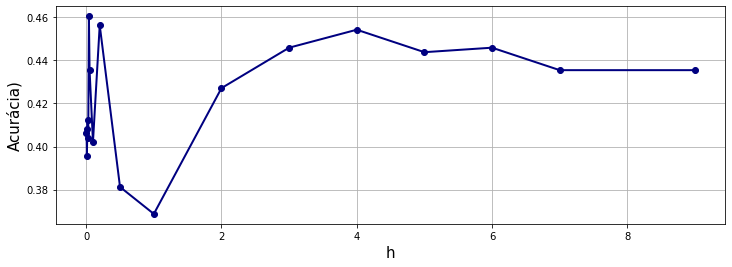

In [10]:
data = pd.read_csv('/content/winequality-red.csv', header=(0))
#display(data)

df = pd.DataFrame(data)

classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  
# Converte para matriz e vetor do numpy
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

# Transforma os dados para terem media igual a zero e variancia igual a 1
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# Seleciona os conjuntos de treinamento e teste
p = 0.7 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

####  Realiza a classificacao ####

vacc = []
vh = [0.001,0.005,0.01,0.02,0.03,0.04, 0.05, 0.1, 0.2, 0.5, 1, 2,3,4, 5,6,7,9]
plt.figure(figsize=(12,4))
for h in vh:
    # Matriz que armazena as probabilidades para cada classe
    P = pd.DataFrame(data=np.zeros((x_train.shape[0], len(classes))), columns = classes) 
    Pc = np.zeros(len(classes)) # Armaze a fracao de elementos em cada classe
    for i in np.arange(0, len(classes)): # Para cada classe
        elements = tuple(np.where(y_train == int(classes[i]))) # elmentos na classe i
        Pc[i] = len(elements)/len(y_train) # Probabilidade pertencer a classe i
        Z = x_train[elements,:][0].astype(int) # Elementos no conjunto de treinamento
        kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(Z)
        for j in np.arange(0,x_test.shape[0]): # para cada observacao no conjunto de teste
            x = x_test[j,:]
            x = x.reshape((1,len(x)))
            # calcula a probabilidade pertencer a cada classe
            pj = np.exp(kde.score_samples(x)) 
            P[classes[i]][j] = pj*Pc[i]

    y_pred = [] # Vetor com as classes preditas
    for i in np.arange(0, x_test.shape[0]):
        c = np.argmax(np.array(P.iloc[[i]]))
        y_pred.append(classes[c])
    y_pred = np.array(y_pred, dtype=int)
    # calcula a acuracia
    score = accuracy_score(y_pred, y_test)
    vacc.append(score)
    #print('Acuracia:', score)

im  = vacc.index(max(vacc))
print(f'Hiperparâmetro h que possui maior accuracy: {vh[im]}')
    
plt.plot(vh,vacc, 'o-', color = '#000080', linewidth=2)
plt.xlabel('h', fontsize = 15)
plt.ylabel('Acurácia)', fontsize = 15)
plt.grid(True)
plt.show(True)

**3-** Faça a classificação dos dados gerados artificialmente com o código abaixo. Compare os resultados para os métodos Naive Bayes, Classificador Bayesiano paramétrico e o classificador Bayesiano não-paramétrico (escolha um valor para h).

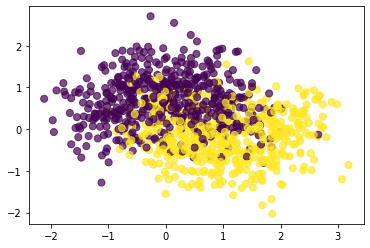

In [11]:
plt.figure(figsize=(6,4))
n_samples = 1000
data = datasets.make_moons(n_samples=n_samples, noise=.5)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)


# **Naive Bayes**

Selecionando os conjuntos de treinamento e teste.

In [15]:
p = 0.7 # fracao de elementos no conjunto de treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

definindo uma função para calcular a função de verossimilhança.

In [16]:
def likelyhood(y, Z):
    def gaussian(x, mu, sig):
        p = (1/np.sqrt(2*np.pi*sig))*np.exp((-1/2)*((x-mu)/sig)**2)
        return p 
    lk = 1
    for j in np.arange(0, Z.shape[1]):
        m = np.mean(Z[:,j])
        s = np.std(Z[:,j])      
        lk = lk*gaussian(y[j], m, s)
    return lk

realizamos a estimação para cada classe:

In [17]:
P = pd.DataFrame(data=np.zeros((X_test.shape[0], len(classes))), columns = classes) 
for i in np.arange(0, len(classes)):
    elements = tuple(np.where(y_train == classes[i]))
    Z = X_train[elements,:][0]
    for j in np.arange(0,X_test.shape[0]):
        x = X_test[j,:]
        pj = likelyhood(x,Z)
        priori = len(elements)/X_train.shape[0]
        P[classes[i]][j] = pj*priori

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [18]:
#Matriz de probabilidade
P = pd.DataFrame(data=np.zeros((X_test.shape[0], len(classes))), columns = classes) 
Pc = np.zeros(len(classes)) #fraction of elements in each class
for i in np.arange(0, len(classes)):
    elements = np.array(np.where(y_train == classes[i]))
    Pc[i] = elements.shape[1]/len(y_train)
    Z = X_train[elements,:][0].astype(float)
    m = np.mean(Z, axis = 0)
    cv = np.cov(np.transpose(Z))
    for j in np.arange(0,X_test.shape[0]):
        x = X_test[j,:]
        pj = multivariate_normal.pdf(x, mean=m, cov=cv, allow_singular=True)
        P[classes[i]][j] = pj*Pc[i]

y_pred1 = []
#np.array(test_x.shape[0], dtype=str)
for i in np.arange(0, X_test.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred1.append(classes[c])
y_pred1 = np.array(y_pred1)
y_test = np.array(y_test)

from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_pred1, y_test)
print('Accuracy (bayes classifier)', score1)

# Matriz que armazena as probabilidades para cada classe
P = pd.DataFrame(data=np.zeros((X_test.shape[0], len(classes))), columns = classes) 
Pc = np.zeros(len(classes)) # Armaze a fracao de elementos em cada classe
h = 0.5
for i in np.arange(0, len(classes)): # Para cada classe
    elements = tuple(np.where(y_train == classes[i])) # elmentos na classe i
    Pc[i] = len(elements)/len(y_train) # Probabilidade pertencer a classe i
    Z = X_train[elements,:][0].astype(float) # Elementos no conjunto de treinamento
    kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(Z)
    for j in np.arange(0,X_test.shape[0]): # para cada observacao no conjunto de teste
        x = X_test[j,:]
        x = x.reshape((1,len(x)))
        # calcula a probabilidade pertencer a cada classe
        pj = np.exp(kde.score_samples(x)) 
        P[classes[i]][j] = pj*Pc[i]
        
y_pred = [] # Vetor com as classes preditas
for i in np.arange(0, X_test.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred.append(classes[c])
y_pred = np.array(y_pred, dtype=str)
# calcula a acuracia

y_test_conv = np.char.mod('%d', y_test)

score2 = accuracy_score(y_pred, y_test_conv)
print('Accuracy (non parametric bayes classifier)', score2)

# Matriz que armazena as probabilidades para cada classe
P = pd.DataFrame(data=np.zeros((X_test.shape[0], len(classes))), columns = classes) 
for i in np.arange(0, len(classes)):
    elements = tuple(np.where(y_train == classes[i]))
    Z = X_train[elements,:][0]
    for j in np.arange(0,X_test.shape[0]):
        x = X_test[j,:]
        pj = likelihood(x,Z)
        priori = len(elements)/X_train.shape[0]
        P[classes[i]][j] = pj*priori
P.head(10)
        
from sklearn.metrics import accuracy_score

y_pred2 = []
for i in np.arange(0, P.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred2.append(P.columns[c])
y_pred2 = np.array(y_pred2, dtype=str)

y_test_conv2 = np.char.mod('%d', y_test)

score3 = accuracy_score(y_pred2, y_test_conv2)
print('Accuracy (Naive Bayes):', score3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: Degrees of freedom <= 0 for slice
  if __name__ == '__main__':


ValueError: ignored